In [1]:
# Importer les packages necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

# Affichage
%matplotlib inline

#Fixer la sequence des valeurs aleatoires
np.random.seed(0)

In [2]:
#charger le fichier CVS dans un data frame pandas
df = pd.read_csv("lending_club_loans.csv")

In [3]:
#Liste des pridecteurs
predictors = df.columns
predictors

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'application_type',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [4]:
#Nombre des lignes ont été founris
print(df.shape[0])

39786


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39786 non-null  int64  
 1   member_id                   39786 non-null  int64  
 2   loan_amnt                   39786 non-null  int64  
 3   funded_amnt                 39786 non-null  int64  
 4   funded_amnt_inv             39786 non-null  float64
 5   term                        39786 non-null  object 
 6   int_rate                    39786 non-null  object 
 7   installment                 39786 non-null  float64
 8   grade                       39786 non-null  object 
 9   sub_grade                   39786 non-null  object 
 10  emp_length                  38708 non-null  object 
 11  home_ownership              39786 non-null  object 
 12  annual_inc                  39786 non-null  float64
 13  verification_status         397

In [6]:
df.values.dtype

dtype('O')

In [7]:
for col in predictors:
    print(df[col].unique())
    print('Pour la colonne : {} les valeurs sont  "{}!"'.format(col, df[col].unique()))

[1077501 1077430 1077175 ...   90395   90376   87023]
Pour la colonne : id les valeurs sont  "[1077501 1077430 1077175 ...   90395   90376   87023]!"
[1296599 1314167 1313524 ...   90390   89243   86999]
Pour la colonne : member_id les valeurs sont  "[1296599 1314167 1313524 ...   90390   89243   86999]!"
[ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800

[' 36 months' ' 60 months']
Pour la colonne : term les valeurs sont  "[' 36 months' ' 60 months']!"
['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.

[   0.    156.66   26.06  496.25   77.23  415.31  488.1     5.99 1972.73
 1429.29  114.92 1477.09  484.99  487.89  681.96  945.46  408.38]
Pour la colonne : out_prncp_inv les valeurs sont  "[   0.    156.66   26.06  496.25   77.23  415.31  488.1     5.99 1972.73
 1429.29  114.92 1477.09  484.99  487.89  681.96  945.46  408.38]!"
[5863.155187 1014.53     3005.666844 ... 5272.161128 5174.198551
 9195.263334]
Pour la colonne : total_pymnt les valeurs sont  "[5863.155187 1014.53     3005.666844 ... 5272.161128 5174.198551
 9195.263334]!"
[5833.84 1014.53 3005.67 ... 1397.12  672.66  980.83]
Pour la colonne : total_pymnt_inv les valeurs sont  "[5833.84 1014.53 3005.67 ... 1397.12  672.66  980.83]!"
[ 5000.     456.46  2400.   ...  2886.21   544.02 16077.42]
Pour la colonne : total_rec_prncp les valeurs sont  "[ 5000.     456.46  2400.   ...  2886.21   544.02 16077.42]!"
[ 863.16  435.17  605.67 ... 1413.49  174.2  1695.26]
Pour la colonne : total_rec_int les valeurs sont  "[ 863.16  435.17 

## Etape1- Exploration des donnees

<br/><br/>
<div class="alert alert-info" >
  <strong><i class="fa fa-chevron-circle-down"></i> Note: </strong> Afficher les 5 premiers lignes
</div>

In [8]:
df.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39781,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,0.0,Jul-10,80.90,Jun-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39782,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,0.0,Jul-10,281.94,Jul-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39783,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.0,Apr-08,0.00,Jun-07,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39784,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.0,Jan-08,0.00,Jun-07,NaN,INDIVIDUAL,NaN,0,NaN,NaN
39785,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,0.0,Jun-10,256.59,Jun-10,NaN,INDIVIDUAL,NaN,0,NaN,NaN


<br/><br/>
<div class="alert alert-info" >
  <strong><i class="fa fa-chevron-circle-down"></i> Note: </strong> Afficher les statistiques de bases sur les colonnes (numeriques)
  
    
  <ul style="color:#808080">On remarque ?????? donnees manquantes
  </ul>
  
</div>

In [9]:
# Examiner s'il y a des valeurs manqantes
print('Pour la question --> est ce que les donnees contiennent des valeurs manquantes, la réponses est : ?' , df.isnull().values.any())

Pour la question --> est ce que les donnees contiennent des valeurs manquantes, la réponses est : ? True


In [10]:
#calculationthe percentage of missing values for each variable and sort them in ascending order
missing_values_prec = df.isnull().mean().sort_values(ascending=True)

In [11]:
missing_values_prec

id                            0.000000
inq_last_6mths                0.000000
pub_rec                       0.000000
revol_bal                     0.000000
total_acc                     0.000000
initial_list_status           0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
application_type              0.000000
delinq_amnt                   0.000000
earliest_cr_line              0.000000
delinq_2yrs                   0.000000
open_acc                      0.000000
addr_state                    0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv          

<br/><br/>
<div class="alert alert-info" >
  <strong><i class="fa fa-chevron-circle-down"></i> Note: </strong> Examinons ---> Est-ce qu'il y a des dépendances évidentes au niveau des discripteurs ?)

</div>

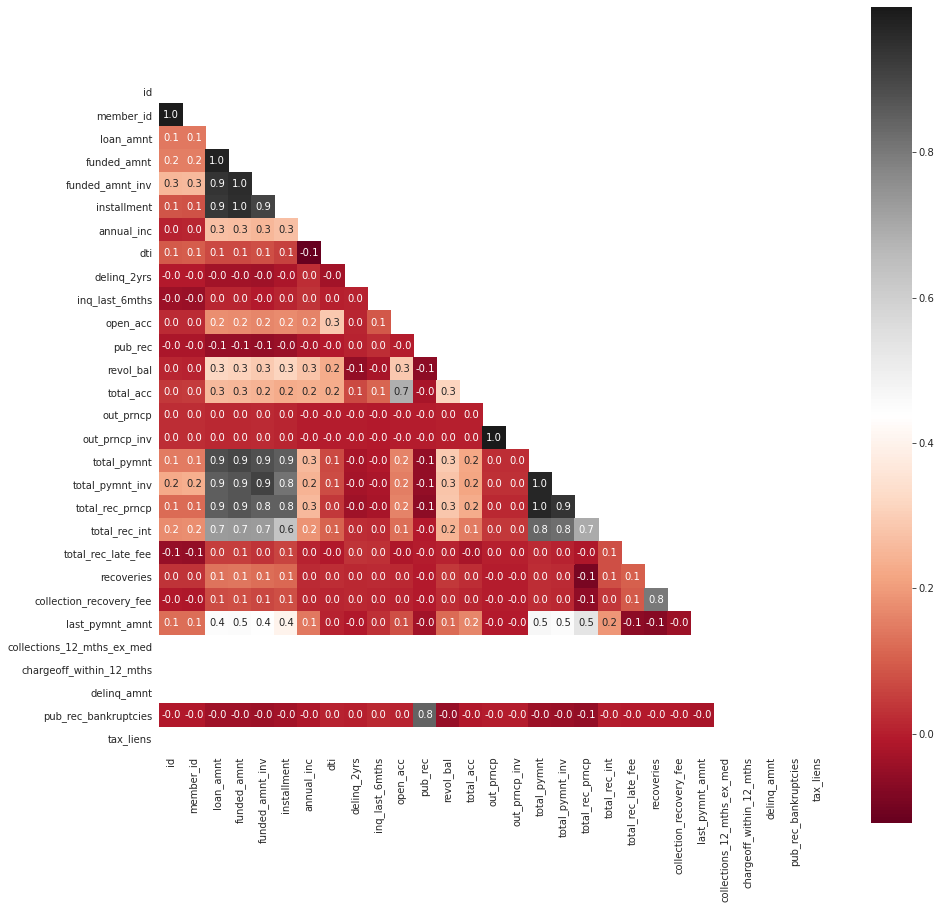

In [12]:
corr = df.corr()
#plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, square=True,
                    cmap='RdGy', annot=True, fmt=".1f",
                     annot_kws={'size':10},
                    cbar=True)#

<div class="alert alert-warning" >
On remarque qu'il ya des colonnes tres correles entre elle et qu'on doit supprimer du data. Les colonnes sont:
  
  <li>loan_amnt</li>
  <li>total_pymnt</li>
  <li>total_pymnt_inv</li>    
  <li>total_pymnt_inv</li>    
  <li>total_rec_pmcp</li> 
  <li>total_rec_int</li>    
  <li>flunded_amnt_inv</li>  
  <li>installment</li> 
    
   Conclusion on remarque qu'il y a une forte correlation entre les colonnes ci-dessus donc on peut garder juste un seul predicteur parmis les 8 et eleminier les autres ---> par exemple on grade :
      <li>total_pymnt</li>

    
</div>

## Étape 2 : Nettoyage des donnees

#### Vérifions les valeurs nulles¶

<br/><br/>
<div class="alert alert-info" >
  <strong><i class="fa fa-chevron-circle-down"></i> Note: </strong> Tranformer les donnees textuelles en numerique
  <ul style="color:#808080">Le but de cette transformation est de :
  <li>Afficher les statistiques de base de toutes les colonnes (y compris les colonnes non numeriques)</li>
  <li>Rendre les donnees compatibles avec les algorithmes d'apprentissage qui fonctionnent seulement avec des donnees numeriques</li>
  <li>Appliquer certaines transformations pour ramener les donnees a la meme echelle (Normalisation)</li>
</ul>
</div>



In [13]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))            

Number of null values in each column:
id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1078
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc        

### Suppression des variables qui ont plus de 1% de valeurs manquantes

In [14]:
df= df.dropna(subset = ['pub_rec_bankruptcies','emp_length'])

### Conversion des variables Object qui renvoient à des dates en des variables de format date


In [15]:
df['issue_d']  = pd.to_datetime(df['issue_d'], format='%b-%y')

In [16]:
df['last_pymnt_d']  = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [17]:
df['last_credit_pull_d']  = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [18]:
df['earliest_cr_line']  = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

### Conversion des variables Object qui renvoient à des pourcentages en des variables numériques

In [19]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

In [20]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

### Conversion de la  variable 'term' qui renvoit au nombre de termes en une variable numérique

In [21]:
df['term'] = df['term'].str.rstrip(' months').astype('float')

### Suppression des variables qui prennent une seule valeur

In [22]:
# valeur unique1 à supprimer 
df[['pymnt_plan']].value_counts()

pymnt_plan
n             38011
dtype: int64

In [23]:
df[['initial_list_status']].value_counts()

initial_list_status
f                      38011
dtype: int64

In [24]:
df[['application_type']].value_counts()

application_type
INDIVIDUAL          38011
dtype: int64

In [25]:
df[['tax_liens']].value_counts()

tax_liens
0.0          38011
dtype: int64

In [26]:
df=df.drop(['tax_liens', 'application_type','initial_list_status','pymnt_plan'], axis=1)

### Suppression des variables qui  n'ont pas d'utilité pour la prédiction 

In [27]:
df=df.drop(['id','member_id','sub_grade','zip_code','addr_state'], axis=1)

### Imputing par moyenne sur l'ensemble des données

In [28]:
df.fillna(value=np.round(df.mean(), decimals=2), inplace=True)

<ipython-input-28-fe1510f65a35>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(value=np.round(df.mean(), decimals=2), inplace=True)


### nettoyage de Variable cible:' loan_status'
Ce nettoyage consiste à supprimer les lignes pour lesquelles  'loan_status' prend des valeurs autres que 'Fully Paid' et 'Charged Off' et de la convertir en une variable binaire qui prend 1 pour 'Fully Paid' et 0 pour 'Charged Off'

In [29]:
df[['loan_status']].value_counts()

loan_status       
Fully Paid            32682
Charged Off            5314
Late (31-120 days)       10
Current                   2
Default                   1
In Grace Period           1
Late (16-30 days)         1
dtype: int64

In [30]:
print('Number of all observations is : {}'.format(len(df)))
print('Number of observations after first cleaning is :{}'.format(len(df.dropna(subset = ['pub_rec_bankruptcies','emp_length']))))

Number of all observations is : 38011
Number of observations after first cleaning is :38011


In [31]:
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0, "Late (31-120 days)": 2
                                     , 'Current':2,'Late (16-30 days)':2, 'In Grace Period':2, 'Default':2}}
df = df.replace(mapping_dictionary)

In [32]:
df=df[df['loan_status'] < 2]

In [33]:
df['loan_status']

0        1
1        0
2        1
3        1
4        1
        ..
39631    1
39642    1
39692    0
39735    0
39749    1
Name: loan_status, Length: 37996, dtype: int64

#### Traitement des variables ordinales: 'grade' et 'emp_lenghth'

In [34]:
mapping_dict = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"n/a": 0
},
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
}
}
df = df.replace(mapping_dict)


#### Traitement des variables nominales : les reste des variables 'object'

In [35]:
df=pd.get_dummies(df)

In [36]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,...,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,5000,5000,4975.0,36.0,10.65,162.87,2,10,24000.0,2011-12-01,...,0.0,0,0.0,0,0,0,1,0,0,1
1,2500,2500,2500.0,60.0,15.27,59.83,3,0,30000.0,2011-12-01,...,0.0,0,0.0,0,0,0,1,0,1,0
2,2400,2400,2400.0,36.0,15.96,84.33,3,10,12252.0,2011-12-01,...,0.0,0,0.0,0,0,0,1,1,0,0
3,10000,10000,10000.0,36.0,13.49,339.31,3,10,49200.0,2011-12-01,...,0.0,0,0.0,0,0,0,1,0,1,0
4,3000,3000,3000.0,60.0,12.69,67.79,2,1,80000.0,2011-12-01,...,0.0,0,0.0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39631,4800,4800,1100.0,36.0,10.28,155.52,3,1,35000.0,2007-11-01,...,0.0,0,1.0,0,0,0,1,1,0,0
39642,7000,7000,1000.0,36.0,10.59,227.82,3,3,63500.0,2007-11-01,...,0.0,0,1.0,1,0,0,0,1,0,0
39692,9000,9000,700.0,36.0,12.49,301.04,4,8,39000.0,2007-10-01,...,0.0,0,1.0,1,0,0,0,1,0,0
39735,15450,15450,600.0,36.0,11.22,507.46,3,2,40000.0,2007-08-01,...,0.0,0,1.0,1,0,0,0,1,0,0
